<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Construcción y Comparación de Modelos de Clasificación

El objetivo de esta práctica es construir múltiples modelos de clasificación para predecir la probabilidad de que una transacción sea fraudulenta. Además de implementar los modelos, deberás analizar y comparar las métricas obtenidas para seleccionar el modelo que mejor se ajuste al problema. En este laboratorio deberás: 



- Entrenar al menos tres modelos diferentes de clasificación, como:

   - **Regresión logística**

   - **Árboles de decisión**

   - **Bosques aleatorios**

   - etc.


- Obtener las siguientes métricas para cada modelo:

   - Precisión

   - Recall (Sensibilidad)

   - F1-Score

   - Área bajo la curva ROC (AUC-ROC)

   - Matriz de confusión

   - Accuracy

- Visualizar y comparar estas métricas en gráficos claros y explicativos.


- Analizar las métricas de rendimiento de cada modelo.

- Justificar la selección del modelo más adecuado en función del equilibrio entre precisión y recall, así como la interpretación del área bajo la curva ROC.


In [30]:
%load_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from src import soporte_logistica_ensamble as sle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
df = pd.read_pickle("datos/financial_data_target_ajustado.pkl")
df.head()

,is_fraudulent,purchase_category,customer_age,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,location_City-1,location_City-10,location_City-11,...,location_City-46,location_City-47,location_City-48,location_City-49,location_City-5,location_City-50,location_City-6,location_City-7,location_City-8,location_City-9
0,1,0.513546,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.513546,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.513546,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.513546,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.513546,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
soporte = sle.AnalisisModelosClasificacion(df, "is_fraudulent")
soporte.ajustar_modelo("logistic_regression")
soporte.calcular_metricas("logistic_regression")

,train,test
accuracy,0.578625,0.561
precision,0.575239,0.556052
recall,0.578625,0.561
f1,0.57587,0.557449
kappa,0.1397,0.09508
auc,0.627693,0.615044
time_seconds,0.005379,NaN
n_jobs,None,NaN
modelo,logistic_regression,logistic_regression
tiempo_computacion(segundos),NaN,0.005379


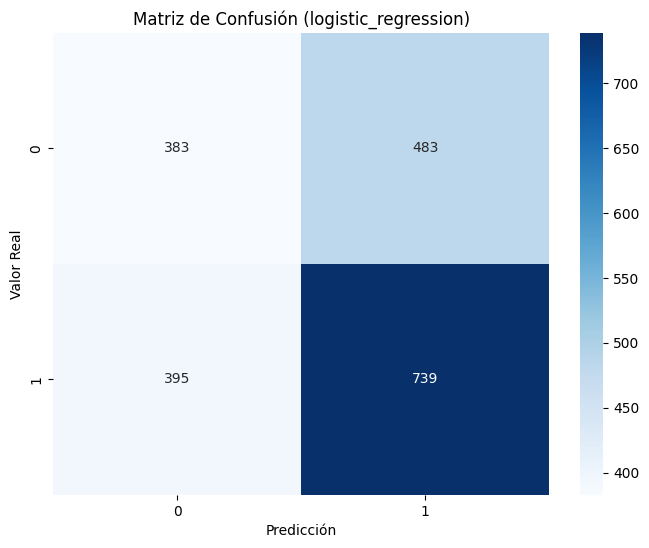

In [33]:
soporte.plot_matriz_confusion("logistic_regression")

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


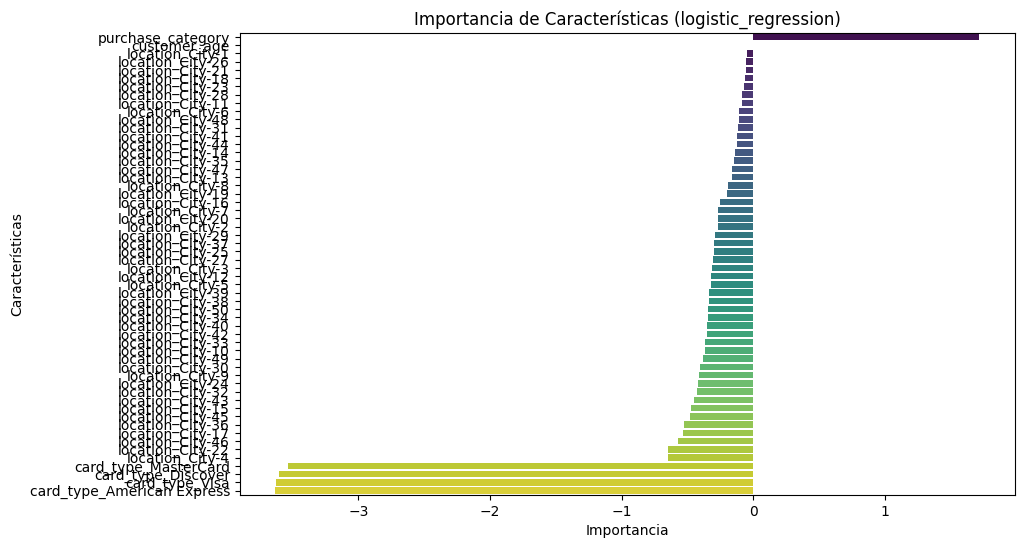

In [34]:
soporte.importancia_predictores("logistic_regression")

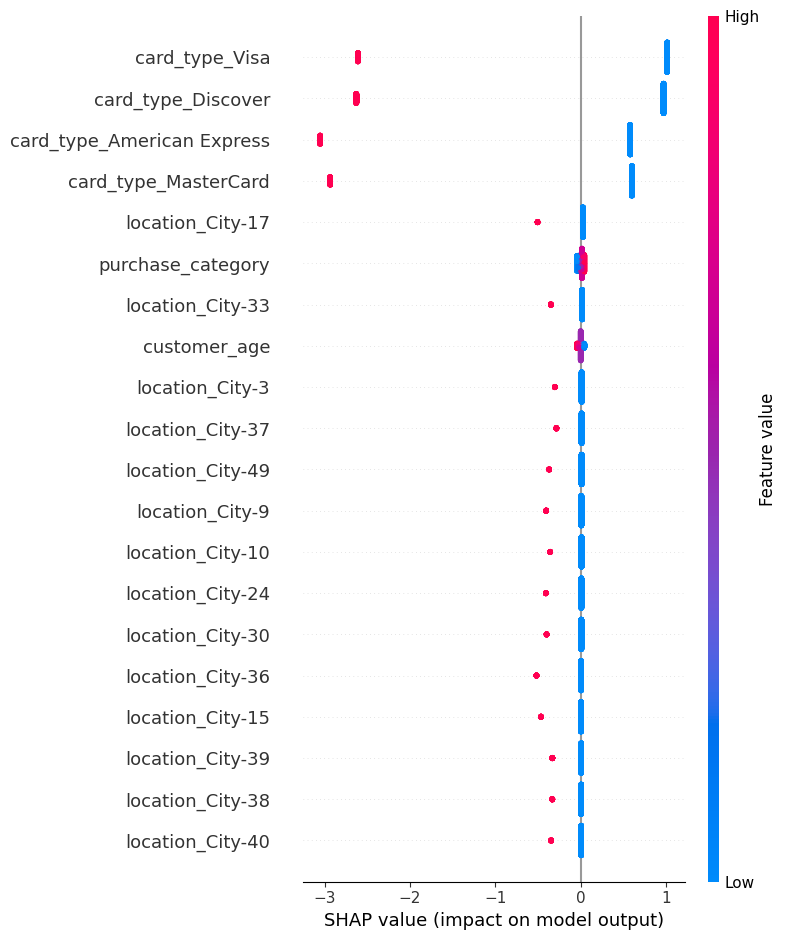

In [35]:
soporte.plot_shap_summary("logistic_regression")

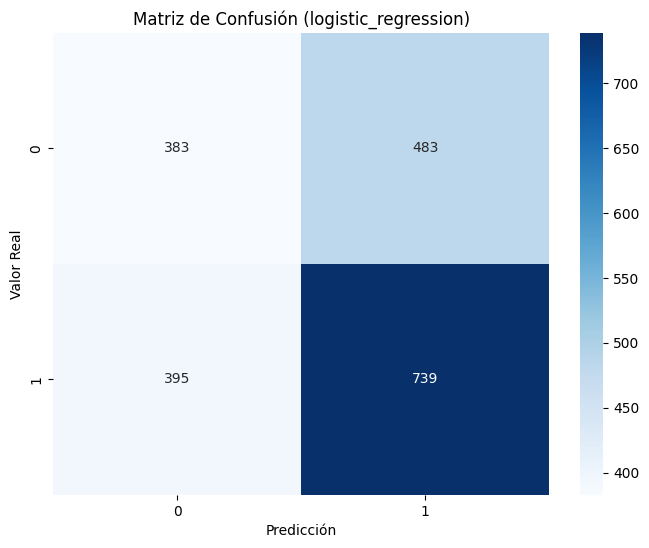

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


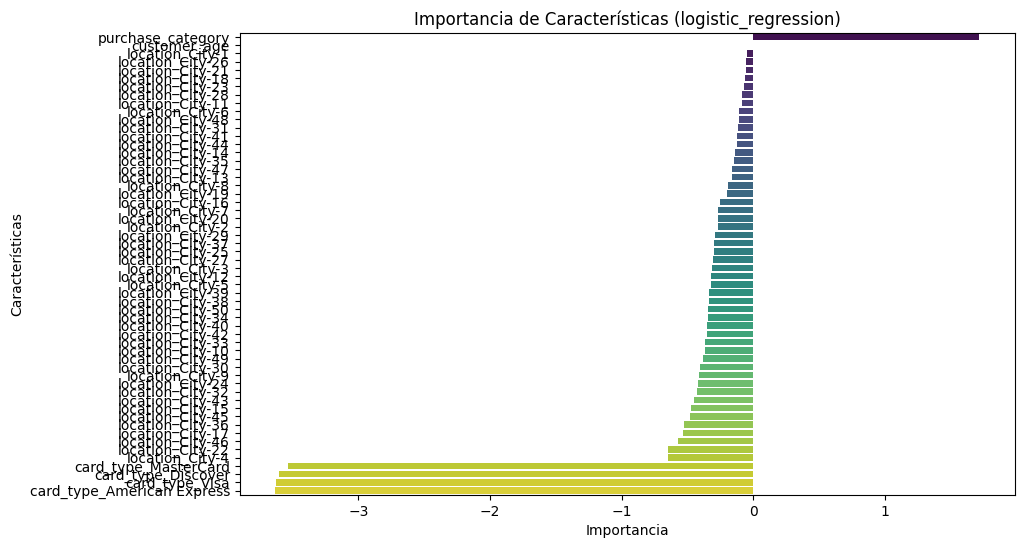

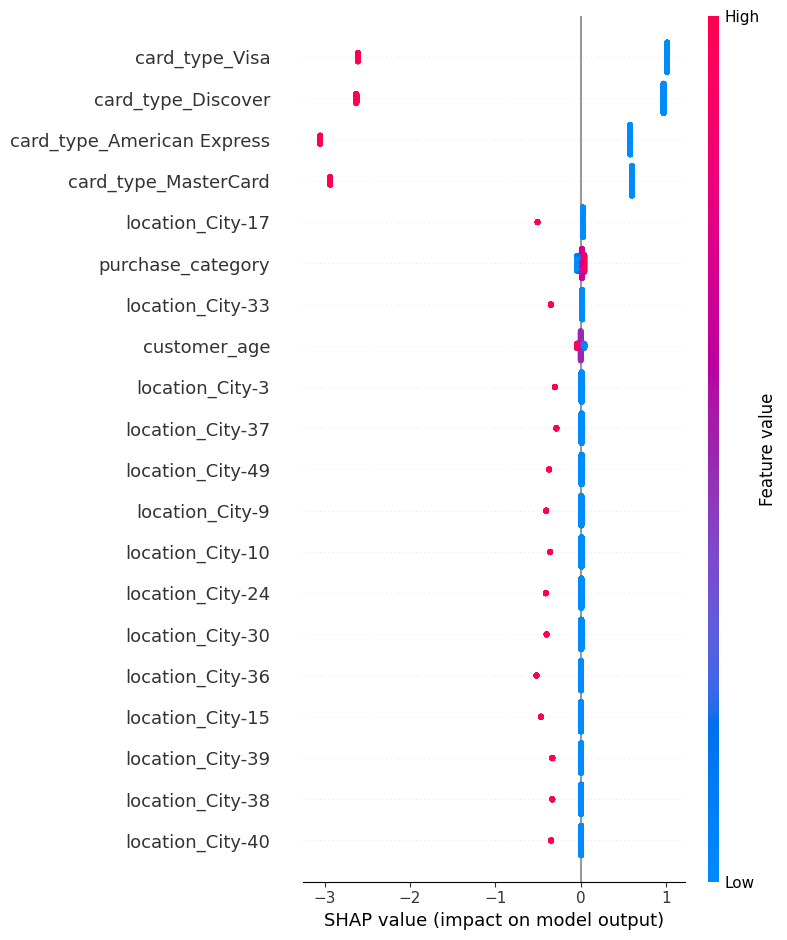

,train,test
accuracy,0.578625,0.561
precision,0.575239,0.556052
recall,0.578625,0.561
f1,0.57587,0.557449
kappa,0.1397,0.09508
auc,0.627693,0.615044
time_seconds,0.006017,NaN
n_jobs,None,NaN
modelo,logistic_regression,logistic_regression
tiempo_computacion(segundos),NaN,0.006017


El mejor modelo es DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5)


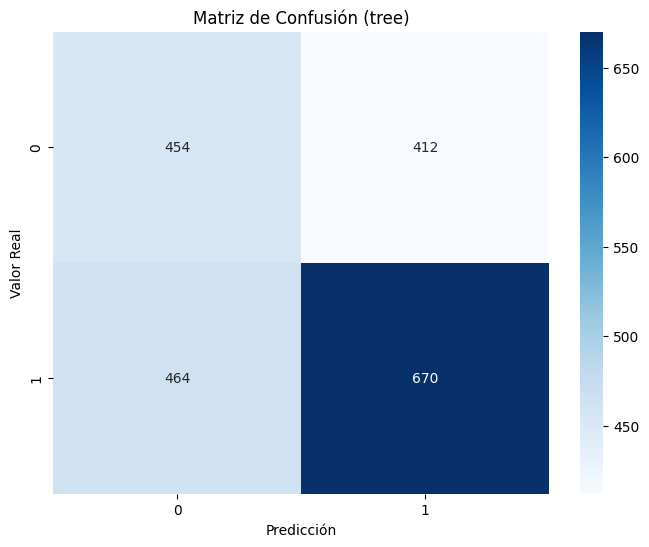

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


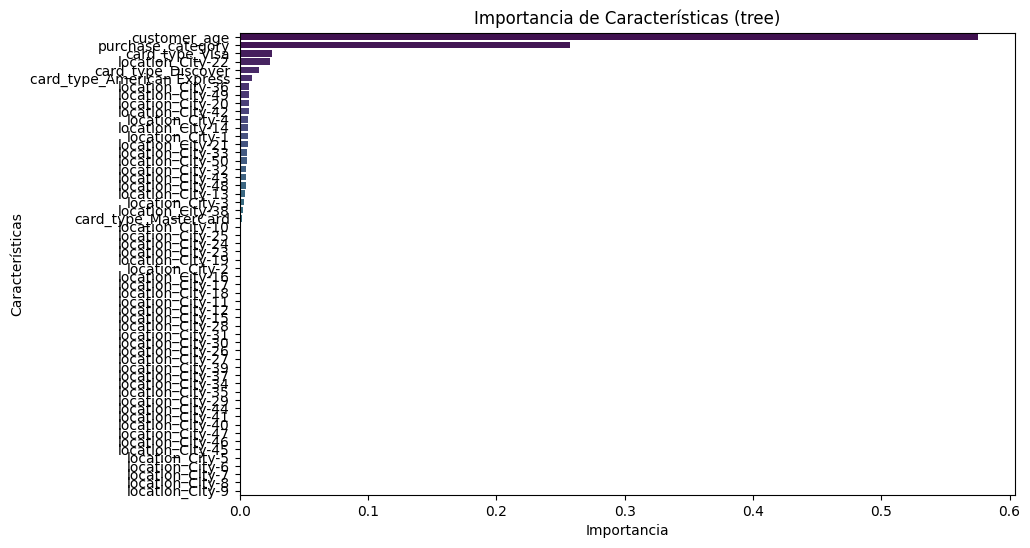

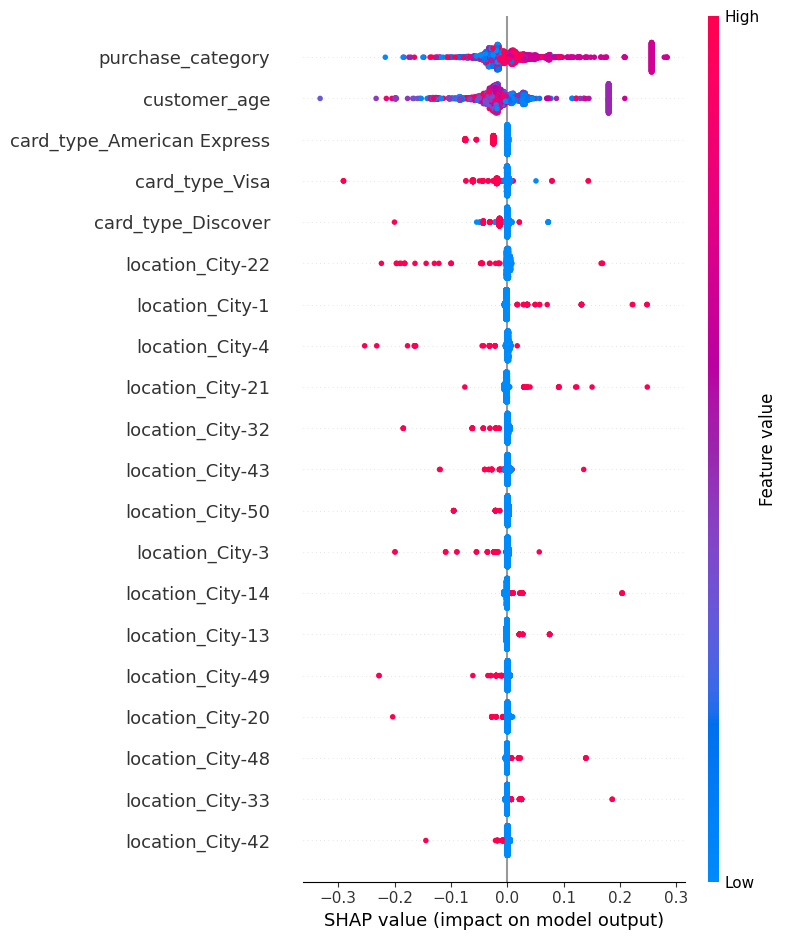

,train,test,train,test
accuracy,0.578625,0.561,0.594,0.562
precision,0.575239,0.556052,0.59823,0.565241
recall,0.578625,0.561,0.594,0.562
f1,0.57587,0.557449,0.595096,0.563244
kappa,0.1397,0.09508,0.185989,0.114268
auc,0.627693,0.615044,0.647702,0.602663
time_seconds,0.006017,NaN,0.002996,NaN
n_jobs,None,NaN,16,NaN
modelo,logistic_regression,logistic_regression,tree,tree
tiempo_computacion(segundos),NaN,0.006017,NaN,0.002996


c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


El mejor modelo es RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50)


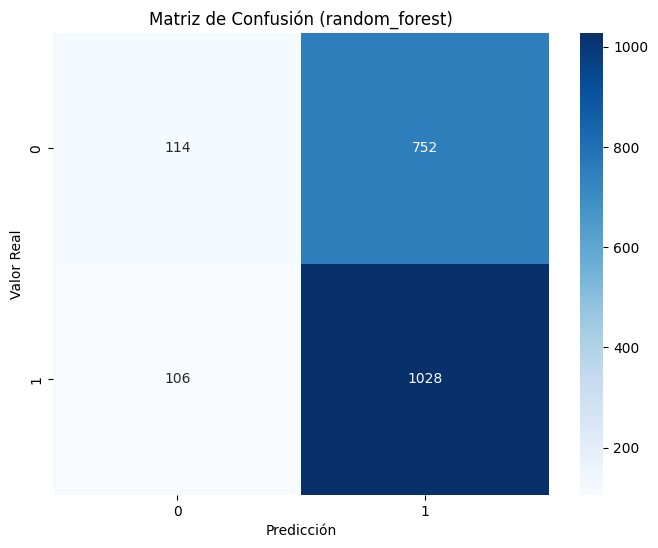

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


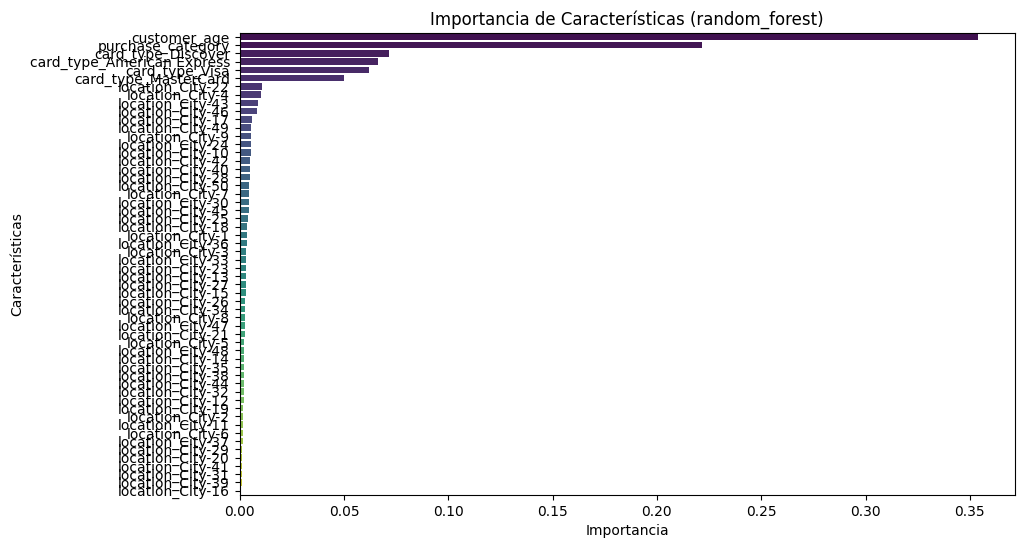

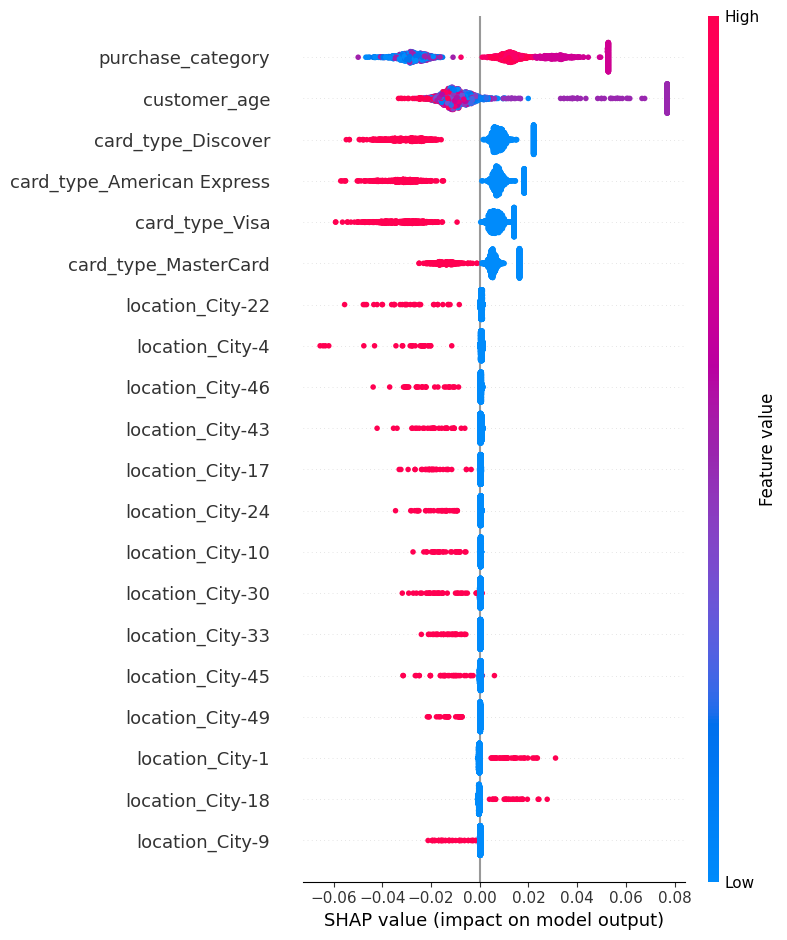

,train,test,train,test,train,test
accuracy,0.578625,0.561,0.594,0.562,0.606875,0.571
precision,0.575239,0.556052,0.59823,0.565241,0.65215,0.551831
recall,0.578625,0.561,0.594,0.562,0.606875,0.571
f1,0.57587,0.557449,0.595096,0.563244,0.537368,0.490958
kappa,0.1397,0.09508,0.185989,0.114268,0.144238,0.041855
auc,0.627693,0.615044,0.647702,0.602663,0.689778,0.619433
time_seconds,0.006017,NaN,0.002996,NaN,0.0156,NaN
n_jobs,None,NaN,16,NaN,None,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest
tiempo_computacion(segundos),NaN,0.006017,NaN,0.002996,NaN,0.0156


El mejor modelo es GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=2,
                           subsample=0.8)


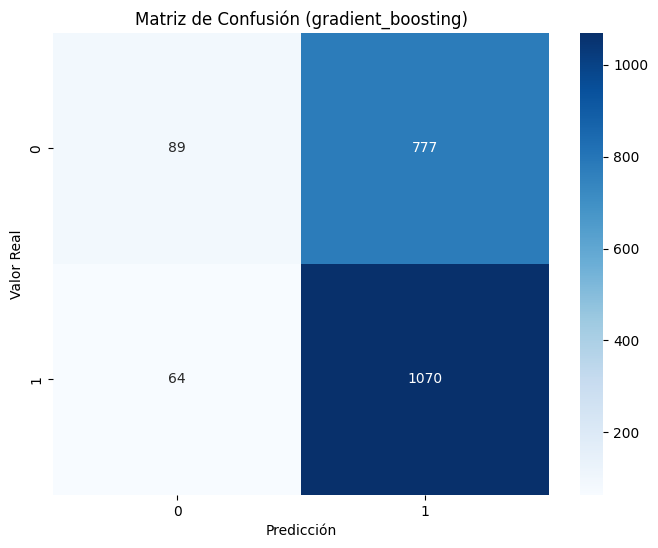

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


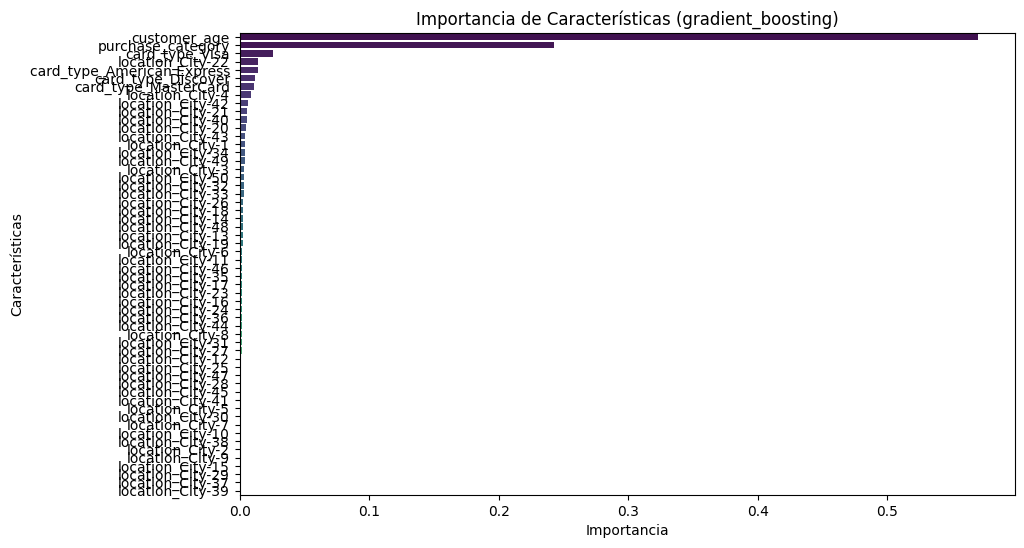

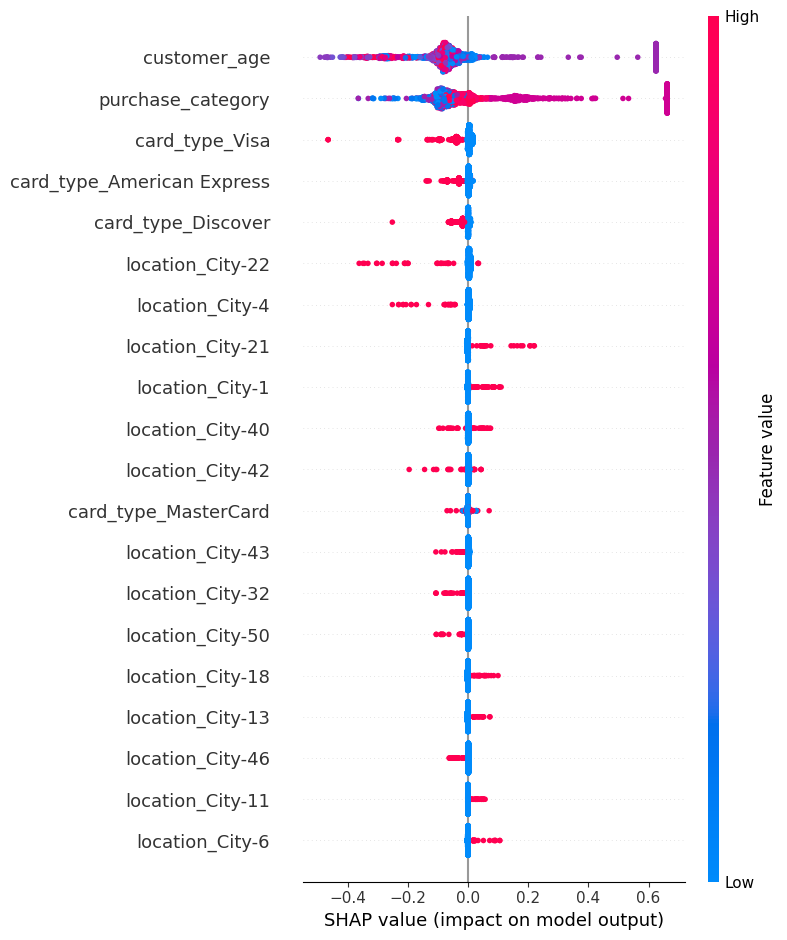

,train,test,train,test,train,test,train,test
accuracy,0.578625,0.561,0.594,0.562,0.606875,0.571,0.5985,0.5795
precision,0.575239,0.556052,0.59823,0.565241,0.65215,0.551831,0.655955,0.580349
recall,0.578625,0.561,0.594,0.562,0.606875,0.571,0.5985,0.5795
f1,0.57587,0.557449,0.595096,0.563244,0.537368,0.490958,0.515247,0.482675
kappa,0.1397,0.09508,0.185989,0.114268,0.144238,0.041855,0.120848,0.051328
auc,0.627693,0.615044,0.647702,0.602663,0.689778,0.619433,0.7042,0.622168
time_seconds,0.006017,NaN,0.002996,NaN,0.0156,NaN,0.020135,NaN
n_jobs,None,NaN,16,NaN,None,NaN,16,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting
tiempo_computacion(segundos),NaN,0.006017,NaN,0.002996,NaN,0.0156,NaN,0.020135


El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


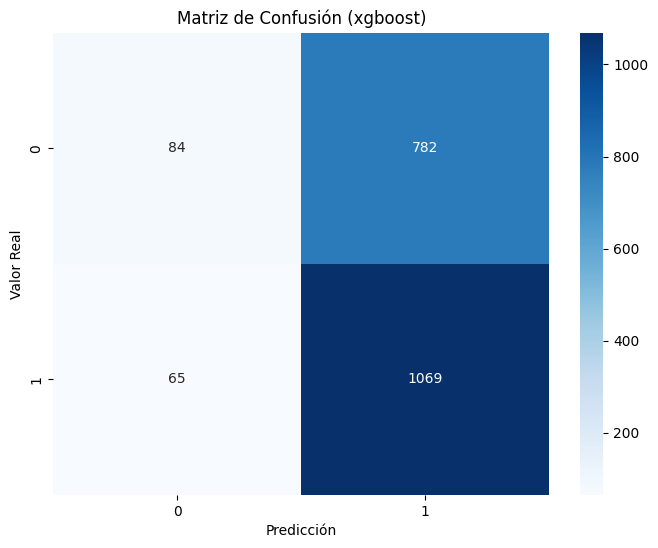

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


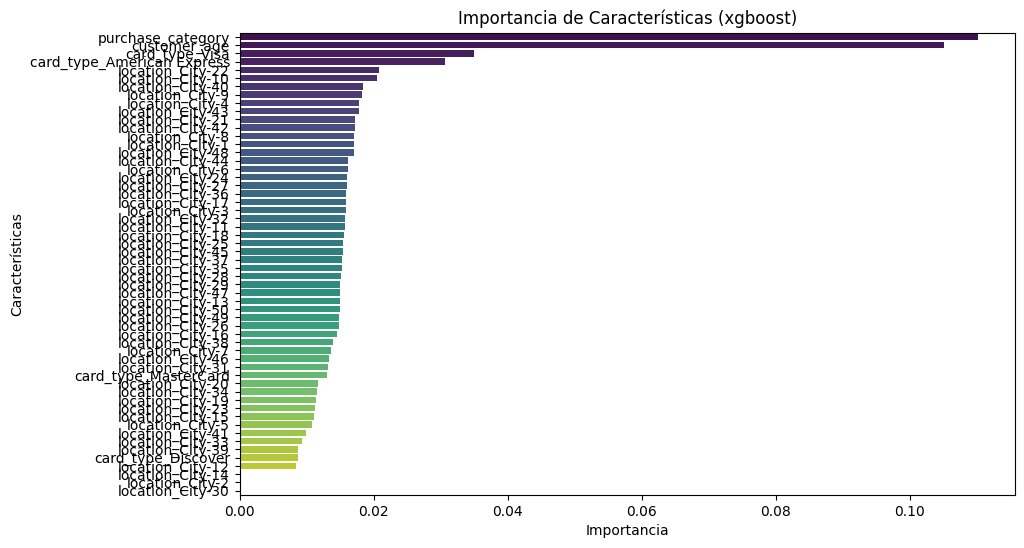

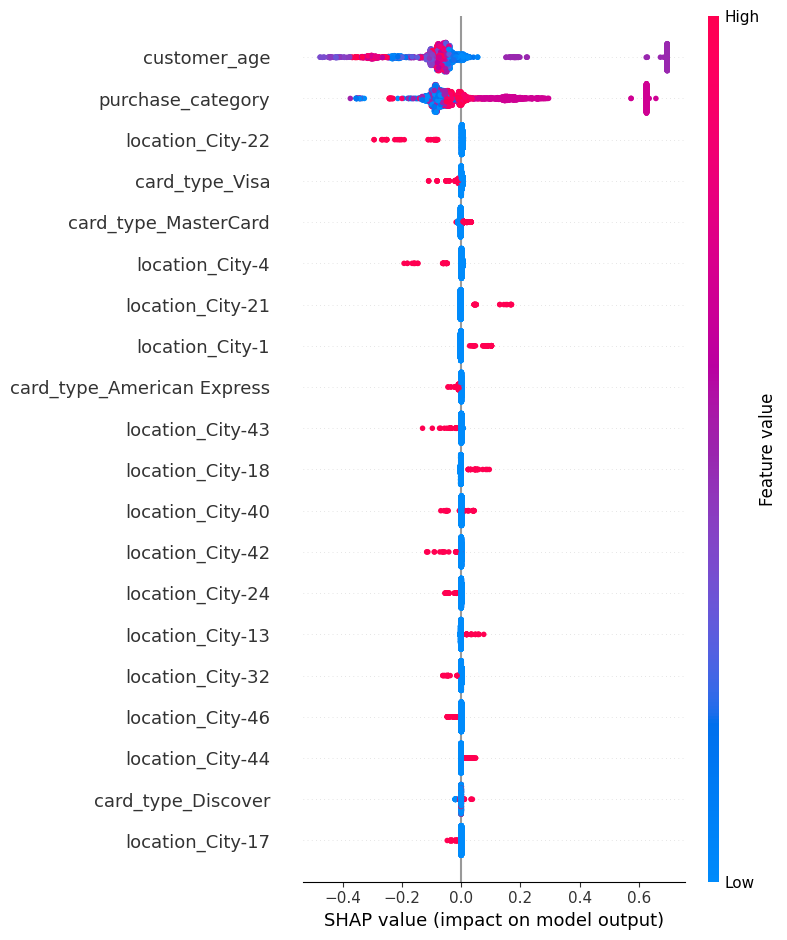

,train,test,train,test,train,test,train,test,train,test
accuracy,0.578625,0.561,0.594,0.562,0.606875,0.571,0.5985,0.5795,0.579125,0.5765
precision,0.575239,0.556052,0.59823,0.565241,0.65215,0.551831,0.655955,0.580349,0.607199,0.571564
recall,0.578625,0.561,0.594,0.562,0.606875,0.571,0.5985,0.5795,0.579125,0.5765
f1,0.57587,0.557449,0.595096,0.563244,0.537368,0.490958,0.515247,0.482675,0.488651,0.477782
kappa,0.1397,0.09508,0.185989,0.114268,0.144238,0.041855,0.120848,0.051328,0.077161,0.043981
auc,0.627693,0.615044,0.647702,0.602663,0.689778,0.619433,0.7042,0.622168,0.6681,0.62407
time_seconds,0.006017,NaN,0.002996,NaN,0.0156,NaN,0.020135,NaN,0.018001,NaN
n_jobs,None,NaN,16,NaN,None,NaN,16,NaN,None,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting,xgboost,xgboost
tiempo_computacion(segundos),NaN,0.006017,NaN,0.002996,NaN,0.0156,NaN,0.020135,NaN,0.018001


,accuracy,precision,recall,f1,kappa
train,0.578625,0.575239,0.578625,0.57587,0.1397
test,0.561,0.556052,0.561,0.557449,0.09508
train,0.594,0.59823,0.594,0.595096,0.185989
test,0.562,0.565241,0.562,0.563244,0.114268
train,0.606875,0.65215,0.606875,0.537368,0.144238
test,0.571,0.551831,0.571,0.490958,0.041855
train,0.5985,0.655955,0.5985,0.515247,0.120848
test,0.5795,0.580349,0.5795,0.482675,0.051328
train,0.579125,0.607199,0.579125,0.488651,0.077161
test,0.5765,0.571564,0.5765,0.477782,0.043981


In [36]:
lista_modelos = ["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"]
df_metricas = pd.DataFrame()
for modelo in lista_modelos:
    # soporte = sle.AnalisisModelosClasificacion(df, "is_fraudulent")
    soporte.ajustar_modelo(modelo)
    df_temp = soporte.calcular_metricas(modelo)
    df_metricas = pd.concat([df_metricas, df_temp], axis=1)
    soporte.plot_matriz_confusion(modelo)
    soporte.importancia_predictores(modelo)
    soporte.plot_shap_summary(modelo)
    display(df_metricas)
df_metricas.head().T

In [37]:
df_resultados_colores = df_metricas.T.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(sle.color_filas_por_modelo, axis=1)
df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo,tiempo_computacion(segundos),nucleos_usados
0,0.578625,0.575239,0.578625,0.575870,0.139700,0.627693,0.006017,None,logistic_regression,nan,nan
1,0.561000,0.556052,0.561000,0.557449,0.095080,0.615044,nan,nan,logistic_regression,0.006017,None
2,0.594000,0.598230,0.594000,0.595096,0.185989,0.647702,0.002996,16,tree,nan,nan
3,0.562000,0.565241,0.562000,0.563244,0.114268,0.602663,nan,nan,tree,0.002996,16
4,0.606875,0.652150,0.606875,0.537368,0.144238,0.689778,0.015600,None,random_forest,nan,nan
5,0.571000,0.551831,0.571000,0.490958,0.041855,0.619433,nan,nan,random_forest,0.015600,None
6,0.598500,0.655955,0.598500,0.515247,0.120848,0.704200,0.020135,16,gradient_boosting,nan,nan
7,0.579500,0.580349,0.579500,0.482675,0.051328,0.622168,nan,nan,gradient_boosting,0.020135,16
8,0.579125,0.607199,0.579125,0.488651,0.077161,0.668100,0.018001,None,xgboost,nan,nan
9,0.576500,0.571564,0.576500,0.477782,0.043981,0.624070,nan,nan,xgboost,0.018001,None


In [38]:
df_gradient = df_metricas.T[df_metricas.T["modelo"] == "gradient_boosting"].T
df_gradient

,train,test
accuracy,0.5985,0.5795
precision,0.655955,0.580349
recall,0.5985,0.5795
f1,0.515247,0.482675
kappa,0.120848,0.051328
auc,0.7042,0.622168
time_seconds,0.020135,NaN
n_jobs,16,NaN
modelo,gradient_boosting,gradient_boosting
tiempo_computacion(segundos),NaN,0.020135
